¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola! Recuerda que para los ejercicio de análisis de datos es necesario desarrollar la introducción, objetivo y etapas de análisis. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente. En un futuro lo podrías complementar con una tabla de contenido.
</div>

# Campaña 2017
El objetivo de este proyecto, es determinar cuál es el mejor plan publicitario para la campaña del año 2017 con respecto a las ventas obtenidas en 2016.

## Inicialización

In [1]:
# importamos las librerías necesarias
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# cargamos los datos del dataset
df_games = pd.read_csv('/datasets/games.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
# mostramos el contenido del dataframe obtenido
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Preparación de los datos

Convertiremos los nombres de las columnas a minúsculas para tener un mejor manejo del dataframe.

In [4]:
df_games.columns=df_games.columns.str.lower()
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Vemos cúal es el tipo de datos para cada columna y si hay valores ausentes.

In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Valores Ausentes

Vemos que hay valores ausentes en la columna name (16713/16715), year_of_release (16446/16715), genre(16713/16715), critic_score(8137/16715), user_score(10014/16715) y rating (9949/16715). Además vemos algunos tipos de datos incorrectos para las columnas year_of_release (que debería ser int) y user_score (que debería ser float).  
Corrijamos primero los valores ausentes.

#### Nombre y genero

In [6]:
# vemos los valores ausentes para la columna 'name'
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# vemos los valores ausentes para la columna 'genre'
df_games[df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el los ajustes en las dos variables anteriores. 
</div>

Para los valores ausentes de las columnas 'name' y 'genre', vemos que se trata de los dos mismos casos, los cuales no continenen más que algunos datos. Por esto, podemos eliminar estos registros, ya que no contienen, por lo menos, un nombre y su ausencia no hará ningún cambio significativo en las estadisticas.

In [8]:
# eliminamos los vales ausentes para las columnas 'name' y 'genre'
df_games=df_games.dropna(subset=['name','genre'])

#### Año de lanzamiento

In [9]:
df_games[df_games['year_of_release'].isna()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15119,Legacy of Ys: Books I & II,DS,NaN,Role-Playing,0.02,0.00,0.00,0.00,NaN,NaN,NaN
11338,Charm Girls Club: My Fashion Show,DS,NaN,Simulation,0.08,0.00,0.00,0.01,NaN,tbd,E
4648,TERA,PC,NaN,Role-Playing,0.25,0.12,0.00,0.05,77.0,6.8,M
11377,Face Racers: Photo Finish,3DS,NaN,Racing,0.08,0.00,0.00,0.01,NaN,tbd,E
2522,The Lord of the Rings: War in the North,PS3,NaN,Action,0.25,0.42,0.01,0.13,63.0,7,M


La columna ‘year_of_release’ es importante para agrupar los datos por año de lanzamiento. Debido a esto, no podemos asignar un año válido a esta columna donde hay valores ausentes, pues esto afectaría las estadísticas de otros años. Además, no podemos eliminar estos registros, ya que aún contienen datos en otras columnas que podrían ser útiles. Por lo tanto, reemplazaremos los años ausentes con el valor 0.

In [10]:
df_games['year_of_release'].fillna(0, inplace=True) 

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información recaba mediante una investigación. Es muy común que cuando trabajamos con datos en la vida real, mucho de estos vengan con valores nulos que en ocasiones tendremos que completar con proxys
</div>

####  Puntuación de la crítica, puntuación de lo usuarios y clasificación

In [11]:
print('valores ausentes en critic_score:',df_games['critic_score'].isna().sum())
print('valores ausentes en user_score:',df_games['user_score'].isna().sum())
print('valores ausentes en rating:',df_games['rating'].isna().sum())

valores ausentes en critic_score: 8576
valores ausentes en user_score: 6699
valores ausentes en rating: 6764


Los valores ausentes de las columnas 'critic_score', 'user_score' y 'rating', solo indican que los juegos no recibieron una puntuación, por parte de los usuarios o la crítica, o que no tienen una clasificación definida, pero aún conservan otros datos. Por otro lado, no podemos sustituir estos valores con 0, pues esto sesgará los resultados a la izquierda, así que usaremos la mediana.  
Para el caso especifico de la clasificación, no podemos asignarles una categoría específica a los videojuegos con valores ausentes. Hacerlo podría distorsionar las estadísticas y sesgarlas a favor del género elegido. Por lo tanto, optaremos por reemplazar los valores faltantes con el carácter 'U' de 'unknown'.

Además, los juegos que tienen una puntuación por parte de los usuarios como ‘por determinar’ (tbd) los consideraremos con una puntuación ausente. Por les asignaremos el valor 'NaN'.

In [14]:
print(df_games['user_score'].value_counts(dropna=False).head())
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan) # asignamos NaN a los juegos con tbd
print('\n')
print(df_games['user_score'].value_counts(dropna=False).head())

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
Name: user_score, dtype: int64


NaN    9123
7.8     324
8       290
8.2     282
8.3     254
Name: user_score, dtype: int64


In [15]:
# obtenemos las medianas para las columnas númericas
critic_score_median = df_games['critic_score'].median()
user_score_median = df_games['user_score'].median()
print(critic_score_median)
print(user_score_median)

71.0
7.5


In [21]:
df_games['critic_score'].fillna(critic_score_median, inplace=True)
df_games['user_score'].fillna(user_score_median, inplace=True)
df_games['rating'].fillna('U', inplace=True)

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Cuando tenemos distribuciones sesgadas como en este caso se recomienda usar la mediana para no sesgar los resultados
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

### Tipos de datos

In [24]:
# Verifiquemos si podemos hacer la conversión de float a int para la columna 'year_of_release'
print(np.array_equal(df_games['year_of_release'],df_games['year_of_release'].astype('int')))

True


Es seguro convertir la columna de año de lanzamiento a tipo entero, ya que no contiene valores con punto decimal. Por lo tanto, procederemos a convertir la columna ‘year_of_release’ a tipo int y la columna ‘user_score’ a tipo float. Esta transformación es apropiada, ya que los años no tienen valores fraccionarios, y el puntaje debe ser de tipo numérico para realizar operaciones con él.

In [25]:
df_games['year_of_release'] = df_games['year_of_release'].astype('int')
df_games['user_score'] = df_games['user_score'].astype('float')

In [26]:
# vemos el dataframe resultante después de las transformaciones
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Ventas totales
Calcularemos las ventas totales para cada juego, sumando las ventas de cada región y crearemos una nueva columna con ese dato.

In [27]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales']
print(df_games['total_sales'])

0        74.09
1        39.47
2        32.23
3        29.82
4        30.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

## Análisis de datos

### Lanzamientos anuales  

Graficaremos la cantidad de juegos lanzados por año para ver si existe algún patrón o diferencia significativa.

In [28]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,U,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,U,30.38


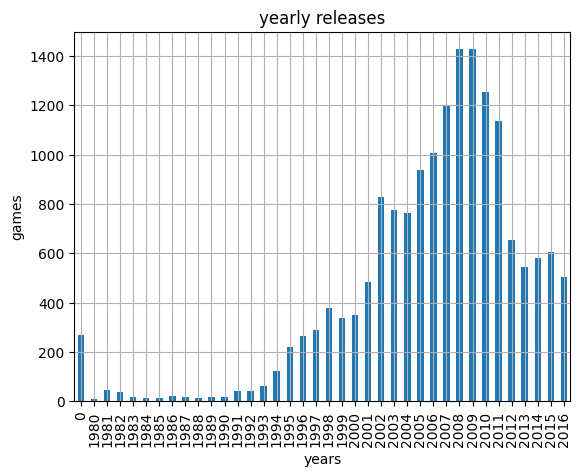

In [29]:
games_per_year = df_games['year_of_release'].value_counts().sort_index()
games_per_year.plot(
    kind='bar', 
    title='yearly releases', 
    xlabel='years',
    ylabel='games',
    grid=True
)
plt.show()

Entre 2002 y 2011, hubo un auge en el lanzamiento de videojuegos. En los años más recientes, el número de lanzamientos se ha reducido y se ha mantenido en un promedio aproximado de 500 a 600 juegos por año. Esto podría deberse a una disminución real en la producción de videojuegos o, alternativamente, podría ser que el conjunto de datos contenga más videojuegos del período mencionado

### Plataformas
Realizaremos un análisis con respecto a los datos anuales de las plataformas con mayores ventas. Con estos resultados, veremos el incremento y la disminución en las ventas de cada plataforma atravez de los años.

In [31]:
# Obtenemos una lista de las plataformas con mejores ventas en los últimos años
df_last_games = df_games[df_games['year_of_release']>2011] # filtramos los videjuegos más recientes
df_platforms = df_last_games.groupby('platform')['total_sales'].sum().sort_values()
print(df_platforms)

platform
PSP      11.02
DS       11.84
Wii      32.76
PSV      43.38
PC       56.88
WiiU     76.24
XOne    145.05
3DS     185.74
X360    216.14
PS3     245.53
PS4     265.79
Name: total_sales, dtype: float64


In [36]:
# Creamos una lista de las plataformas con más de 70 millones de dolares en ventas
"""
best_sellers = []
for p in df_platforms.loc['Wii':].index:
    best_sellers.append(p)
print(best_sellers)
"""

"\nbest_sellers = []\nfor p in df_platforms.loc['Wii':].index:\n    best_sellers.append(p)\nprint(best_sellers)\n"

In [35]:
# obtenemos las ventas de los lanzamientos anuales (2011 en adelante), agrupados por plataforma
df_platforms_per_year = df_last_games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
# comprobamos que la plataforma esté dentro de 'best_sellers'
#df_platforms_per_year = df_platforms_per_year[df_platforms_per_year['platform'].isin(best_sellers)]
print(df_platforms_per_year)

   platform  year_of_release  total_sales
0       3DS             2012        48.77
1       3DS             2013        53.97
2       3DS             2014        41.75
3       3DS             2015        26.75
4       3DS             2016        14.50
5        DS             2012        10.42
6        DS             2013         1.42
7        PC             2012        20.41
8        PC             2013        11.27
9        PC             2014        12.38
10       PC             2015         7.93
11       PC             2016         4.89
12      PS3             2012        90.87
13      PS3             2013        95.85
14      PS3             2014        40.88
15      PS3             2015        14.70
16      PS3             2016         3.23
17      PS4             2013        22.12
18      PS4             2014        84.22
19      PS4             2015       100.44
20      PS4             2016        59.01
21      PSP             2012         7.56
22      PSP             2013      

<AxesSubplot:title={'center':'Yearly Sales'}, xlabel='years', ylabel='MM'>

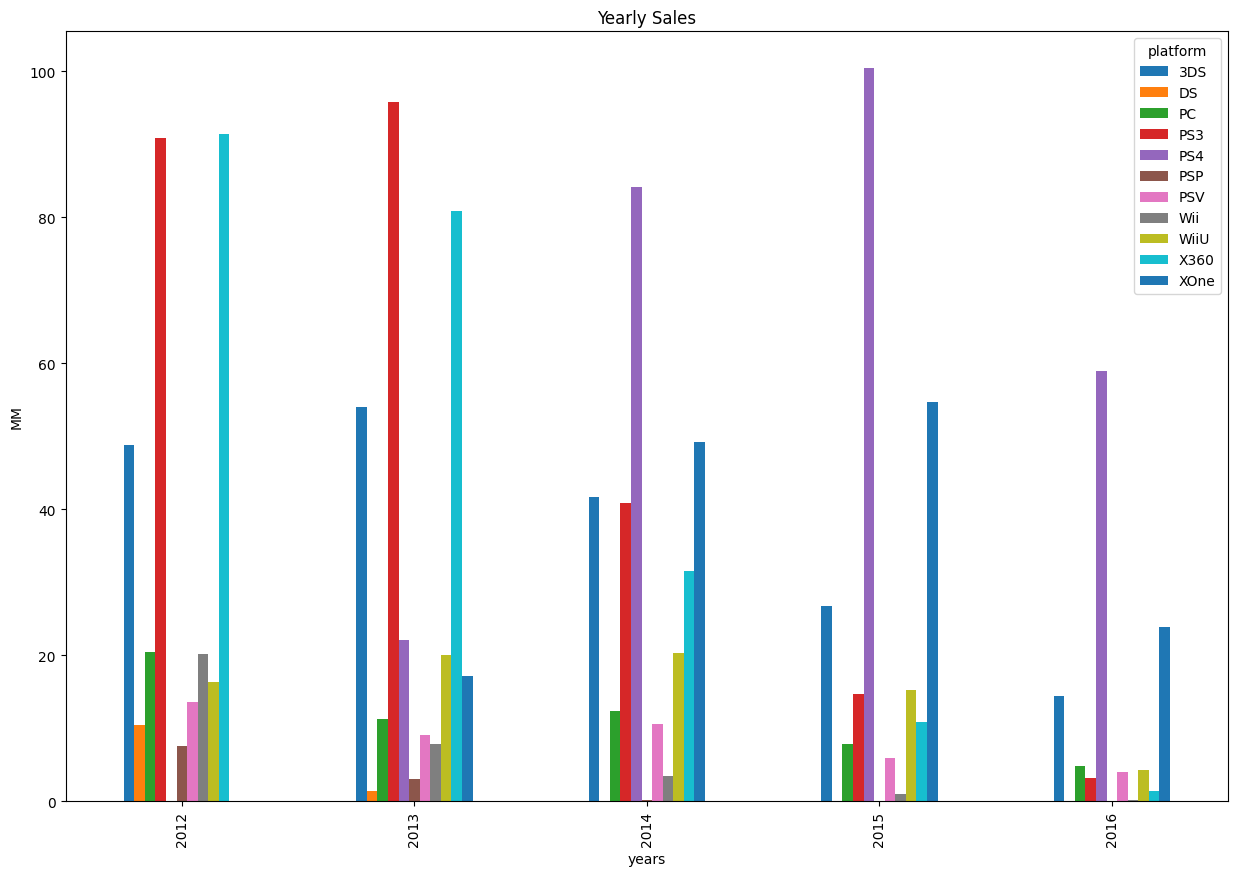

In [37]:
pivot_platforms_per_year = df_platforms_per_year.pivot_table(index='year_of_release', columns='platform', values='total_sales')
colores = plt.cm.coolwarm(np.linspace(0, 1, len(pivot_platforms_per_year)))
pivot_platforms_per_year.plot(
    kind='bar',
    title='Yearly Sales',
    xlabel='years',
    ylabel='MM',
    figsize=[15,10],
    #color=colores
)

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

In [38]:
# obtenemos los años transcurridos para el tiempo en el mercado de cada plataforma
df_platforms_per_year.groupby('platform')['year_of_release'].max()-df_platforms_per_year.groupby('platform')['year_of_release'].min()

platform
3DS     4
DS      1
PC      4
PS3     4
PS4     3
PSP     3
PSV     4
Wii     4
WiiU    4
X360    4
XOne    3
Name: year_of_release, dtype: int64

Con respecto al gráfico obtenido, podemos observar varias cosas. En primer lugar, notamos que una plataforma puede desaparecer del mercado en un periodo de 4 años, mientras que las nuevas plataformas, pueden alcanzar su pico máximo de ventas en un periodo de 3 años. Por ejemplo, tenemos la plataforma la PS4, que es relativamente nueva y recien lleva 4 años en el mercado. Es interesante ver cómo algunas plataformas que antes dominaban el mercado, como el Xbox 360, han reducido sus ventas significativamente. Esto podría deberse a la aparición de nuevas versiones de la misma consola o a la competencia de otras plataformas, así como el lanzamiento de nuevos juegos que no son compatibles con las antiguas plataformas.

A partir de la información obtenida y con el objetivo de obtener resultados más significativos, nos centraremos únicamente en el período de 2011 a 2016, ya que el objetivo de este proyecto es obtener un plan de negocio para obtener mejores ventas en 2017 y lo mejor será tener información actualizada.   
Con respecto a las ventas registradas en los últimos años, las plataformas más rentables, aquellas que han experimentado un incremento en sus ventas o que han logrado mantenerse en el mercado a pesar del paso del tiempo, son XOne, PS4, 3DS, PC y WiiU.

In [40]:
# obtenemos una df en el que solo se incluyan videojuegos que hayan sido lanzados después del 2011
# top_selling_platforms = ['XOne', 'PS4', '3DS', 'PC', 'WiiU']
df_games_filtered = df_games[df_games['year_of_release']>=2011]
df_games_filtered.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,13.41
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,U,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,71.0,7.5,U,13.82


### Ventas globales de todos los juegos, desglosados por plataforma.

platform
PS2       0.35
PSP      28.00
DS       36.14
PSV      47.38
WiiU     76.24
PC       86.58
Wii      87.13
XOne    145.05
3DS     244.54
PS4     265.79
X360    347.25
PS3     380.75
Name: total_sales, dtype: float64

count     12.000000
mean     145.433333
std      130.892693
min        0.350000
25%       44.570000
50%       86.855000
75%      249.852500
max      380.750000
Name: total_sales, dtype: float64
Mediana: 86.85500000000006


<AxesSubplot:xlabel='total_sales'>

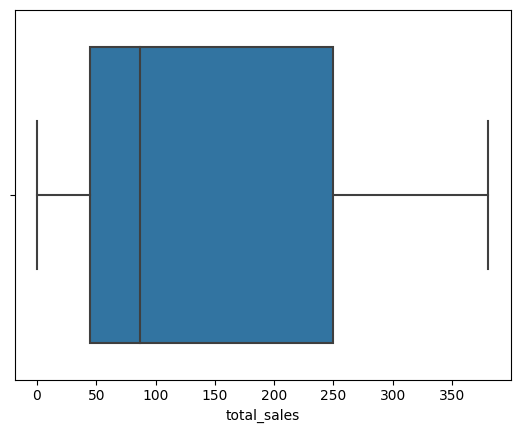

In [41]:
df_sales_per_platform = df_games_filtered.groupby('platform')['total_sales'].sum()
print(df_sales_per_platform.sort_values())
print()
print(df_sales_per_platform.describe())
print('Mediana:',df_sales_per_platform.median())
sns.boxplot(df_sales_per_platform)

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Según los datos, el 75% de las plataformas registra ventas por debajo de los 249.85 millones de dólares (mdd), mientras que la plataforma con el mayor ingreso alcanza los 380.75 mdd. La desviación estándar, que mide la dispersión de los datos con respecto a la media, es alta. Esto significa que los valores varían significativamente en relación al promedio. Además, los datos presentan un sesgo hacia la derecha, lo que indica que la mayoría de las cifras están por encima de la mediana.

<div class="alert alert-block alert-info">
<b>Hola, intenté eliminar las plataformas que yo identifiqué como outliers haciendo el siguiente análisis, pero no veo una diferencia significativa ¿Me podría indicar si estoy haciendo un buen análisis o qué debería tomar en cuenta? Gracias de antemano.</b> <a class="tocSkip"></a>
</div>

Si bien dentro de la gráfica no existen valores atipicos, el hecho de que el valor máximo esté tan lejos del 75% de los datos, podría causar que los resultados de futuras hipótesis se vean afectados. Por esto, eliminaremos esta plataforma del dataframe filtrado y volveremos a gráficar para ver si ha habido una diferencia.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola! Es correcto el análisis que desarrollas. En otros casos, cuando eliminemos outliers nuestros rresultados cambiaran significativamente
</div>

platform
PSP      28.00
DS       36.14
PSV      47.38
WiiU     76.24
PC       86.58
Wii      87.13
XOne    145.05
3DS     244.54
PS4     265.79
X360    347.25
Name: total_sales, dtype: float64

count     10.000000
mean     136.410000
std      111.167818
min       28.000000
25%       54.595000
50%       86.855000
75%      219.667500
max      347.250000
Name: total_sales, dtype: float64
Mediana: 86.85500000000006


<AxesSubplot:xlabel='total_sales'>

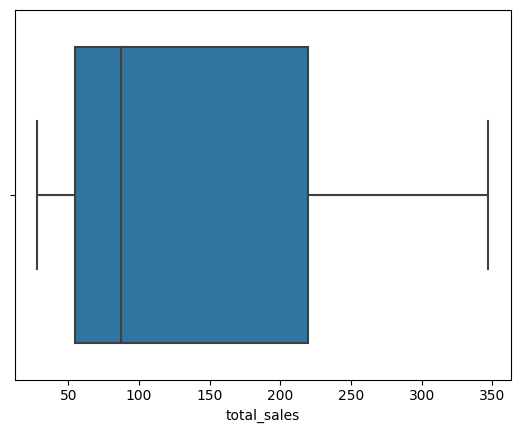

In [52]:
df_2 = df_games_filtered[(df_games_filtered['platform']!='PS3')&(df_games_filtered['platform']!='PS2')]
df_sales_per_platform_2 = df_2.groupby('platform')['total_sales'].sum()
print(df_sales_per_platform_2.sort_values())
print()
print(df_sales_per_platform_2.describe())
print('Mediana:',df_sales_per_platform_2.median())
sns.boxplot(df_sales_per_platform_2)

### Reseñas
Analizaremos como las reseñas de la crítica y de los usarios influyen en la compra de los videojuegos para una plataforma.

In [53]:
# elegiremos la plataforma con más lanzamientos
df_games_filtered.groupby('platform')['name'].count().sort_values()

platform
PS2       7
WiiU    147
DS      184
Wii     197
XOne    247
PSP     312
PC      389
PS4     392
PSV     429
X360    498
3DS     512
PS3     708
Name: name, dtype: int64

#### Puntuación de la crítica

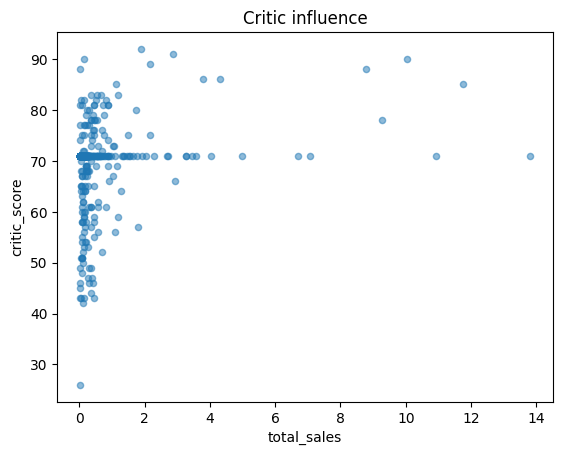

In [67]:
df_games_pc = df_games_filtered[df_games_filtered['platform']=='3DS']
df_games_pc.plot(
    x='total_sales', 
    y='critic_score', 
    kind='scatter', 
    alpha= 0.5,
    title = 'Critic influence'
)
plt.show()

In [68]:
#obtenemos el coeficiente de correlación
print('coeficiente de correlación:',df_games_pc['total_sales'].corr(df_games_pc['critic_score']))

coeficiente de correlación: 0.19884667607997514


Observamos que existe una correlación positiva entre la opinión de la crítica y las ventas, aunque esta correlación es bastante débil, apenas alcanzando un valor de 0.19. Esto sugiere que la influencia de la opinión crítica en las ventas es limitada.

#### Puntuación de los usuarios

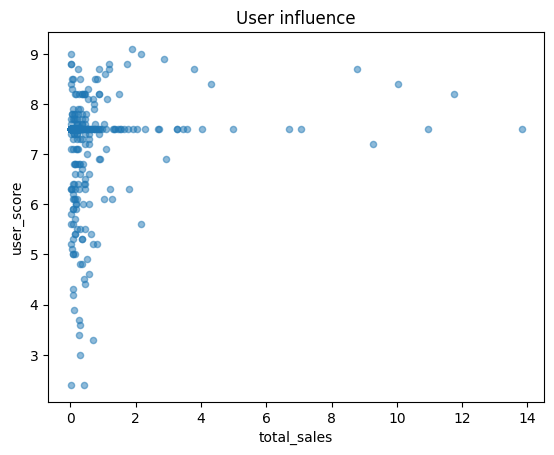

In [69]:
df_games_pc.plot(
    x='total_sales', 
    y='user_score', 
    kind='scatter', 
    alpha= 0.5,
    title = 'User influence'
)
plt.show()

In [70]:
#obtenemos el coeficiente de correlación
print('coeficiente de correlación:',df_games_pc['total_sales'].corr(df_games_pc['user_score']))

coeficiente de correlación: 0.1012632109204729


La correlación entre las ventas y la puntuación de los usuarios es ligeramente más baja. En resumen, parece que la opinión de la crítica tiene una mayor influencia en las ventas en comparación con la opinión de los usuarios.

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

### Ventas en distintas plataformas
Compararemos las ventas de algunos juegos en distintas platafomas

In [71]:
# Obtenemos los juegos con más diversidad de plataformas
games = df_games_filtered.groupby('name')['platform'].count().sort_values().tail(5)
games

name
LEGO Jurassic World         8
Angry Birds Star Wars       8
FIFA 15                     8
LEGO Marvel Super Heroes    9
FIFA 14                     9
Name: platform, dtype: int64

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

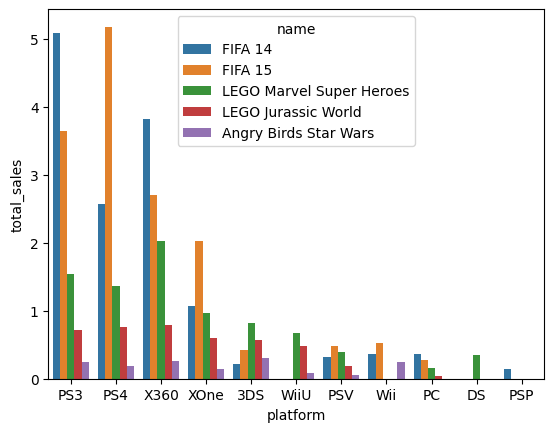

In [72]:
# LEGO Jurassic World
games = df_games_filtered[df_games_filtered['name'].isin(games.index)]
sns.barplot(data=games, x='platform', y='total_sales', hue='name')

Aunque las plataformas que los usarios eligen son muy variadas, podemos identificar algunas que destacan por su versatilidad y que tienen una mayor preferencia.

### Generos
Buscaremos cuales son los generos con mayores ventas.

In [73]:
agg_dict = {'total_sales': 'sum', 'name': 'count'}
df_genres = df_games_filtered.groupby('genre').agg(agg_dict).sort_values('total_sales')
df_genres

,total_sales,name
genre,,
Puzzle,9.21,71
Strategy,20.28,117
Adventure,40.79,410
Simulation,46.73,136
Fighting,60.25,159
Racing,78.20,180
Platform,80.48,122
Misc,127.01,375
Sports,208.27,389


Debido a la variabilidad en el número de videojuegos por género, no podemos determinar el éxito relativo de un género basándonos únicamente en las ventas totales. Sin embargo, podemos calcular una proporción en función de estos dos valores.

In [74]:
df_genres['mean']=df_genres['total_sales']/df_genres['name']
df_genres.sort_values('mean')

,total_sales,name,mean
genre,,,
Adventure,40.79,410,0.099488
Puzzle,9.21,71,0.129718
Strategy,20.28,117,0.173333
Misc,127.01,375,0.338693
Simulation,46.73,136,0.343603
Fighting,60.25,159,0.378931
Action,493.66,1269,0.389015
Racing,78.20,180,0.434444
Role-Playing,225.95,465,0.485914


En promedio, los juegos con mayores ingresos son los shooters, seguidos por los videojuegos de plataforma, y en tercer lugar se encuentran los videojuegos deportes.


## Perfil de usuario por región

### Las cinco principales plataformas para cada región

In [75]:
print(df_games_filtered.groupby('platform')['na_sales'].sum().sort_values().tail())
print(df_games_filtered.groupby('platform')['eu_sales'].sum().sort_values().tail())
print(df_games_filtered.groupby('platform')['jp_sales'].sum().sort_values().tail())

platform
3DS      82.65
XOne     93.12
PS4     108.74
PS3     168.26
X360    226.80
Name: na_sales, dtype: float64
platform
PC       56.70
3DS      61.27
X360    117.10
PS4     141.09
PS3     163.10
Name: eu_sales, dtype: float64
platform
PS4     15.96
PSV     21.84
PSP     24.04
PS3     49.39
3DS    100.62
Name: jp_sales, dtype: float64


En América del Norte, las ventas más altas provienen de la consola Xbox 360, con un total de 226.80 millones de dólares. En Europa, la plataforma líder en ventas es la PS3, con 163.10 millones de dólares. Finalmente, en Japón, la preferida es la Nintendo DS, con 100.62 millones de dólares en ventas. Podemos apreciar que en América del Norte es donde se concentra una mayor cantidad de compradores.

### Los cinco principales géneros para cada región

In [76]:
print(df_games_filtered.groupby('genre')['na_sales'].sum().sort_values().tail())
print(df_games_filtered.groupby('genre')['eu_sales'].sum().sort_values().tail())
print(df_games_filtered.groupby('genre')['jp_sales'].sum().sort_values().tail())

genre
Misc             69.69
Role-Playing     83.78
Sports          108.70
Shooter         194.43
Action          230.92
Name: na_sales, dtype: float64
genre
Racing           40.58
Role-Playing     62.30
Sports           88.48
Shooter         148.02
Action          199.12
Name: eu_sales, dtype: float64
genre
Platform        12.13
Fighting        12.38
Misc            17.60
Action          63.62
Role-Playing    79.87
Name: jp_sales, dtype: float64


Podemos observar que para las tres regiones, los generos 'Action' y 'Misc' ocupan los primeros lugares dentro de las ventas. De hecho Norteamérica y Europa, comparten los primeros 4 generos, en el mismo orden, siendo el más vendido el genero de Acción, a diferencia de Japón, donde el genero más vendido es 'Role-Playing'.

### Clasificación de ESRB por región

In [78]:
print(df_games_filtered.groupby('rating')['na_sales'].sum().sort_values().tail())
print(df_games_filtered.groupby('rating')['eu_sales'].sum().sort_values().tail())
print(df_games_filtered.groupby('rating')['jp_sales'].sum().sort_values().tail())

rating
T       109.31
E10+    117.72
U       123.69
E       170.17
M       308.45
Name: na_sales, dtype: float64
rating
E10+     78.00
T        83.16
U       116.61
E       141.73
M       250.26
Name: eu_sales, dtype: float64
rating
E10+     11.23
M        26.14
T        33.39
E        36.68
U       138.21
Name: jp_sales, dtype: float64


En las tres regiones, las cinco clasificaciones principales son las mismas. Europa y Norteamérica comparten el mismo orden para las tres principales clasificaciones: 'M' (maduro +17), 'E' (para todos) y 'U' (desconocido). Sin embargo, en Japón, el orden es un poco distinto, y los videojuegos con más ventas no tienen clasificación.

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

## Hipótesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Para esta hipótesis, tomaremos la premisa original como la hipótesis nula. Comprobaremos cuál es la probabilidad de que no haya ninguna diferencia entre las calificación para estas dos plataformas.  
Por lo tanto, la hipótesis alternativa, será:"Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes".

In [83]:
# extraemos una muestra de 50 elementos de las calificaciones de los usuarios para cada plataforma
sample_xone = df_games_filtered[df_games_filtered['platform']=='XOne']['user_score'].sample(n=50)
sample_pc = df_games_filtered[df_games_filtered['platform']=='PC']['user_score'].sample(n=50)

# comprobamos si las varianzas son aproximadamente iguales
print('varianza 1:', sample_xone.var())
print('varianza 2:', sample_pc.var())

varianza 1: 1.2070571428571428
varianza 2: 1.8199224489795913


In [81]:
alpha = 0.05  # establecemos el nivel de significancia estadística crítica en 5%

results = st.ttest_ind(sample_xone, sample_pc, equal_var = False) # las varianzas son diferentes, asignamos equal_var = False

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el nivel de significancia
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.27120295266336075
No podemos rechazar la hipótesis nula


Al parecer la posibilidad de que ambas plataformas tengan la misma calificación, es bastante alta, por lo que no podemos rechazar la hipótesis nula.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Esta hipótesis no se pude comprobar directamente, puesto que se tiene que partir de la igualdad. Por lo cuál se tomará la siguiente premisa comp hipótesis nula:  
"Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales"  
y la hipótesis alternativa sería la premisa original.

In [88]:
# extraemos una muestra de 50 elementos de las calificaciones de los usuarios para cada genero
sample_action = df_games_filtered[df_games_filtered['genre']=='Action']['user_score'].sample(n=50)
sample_sports = df_games_filtered[df_games_filtered['genre']=='Sports']['user_score'].sample(n=50)

# comprobamos si las varianzas son aproximadamente iguales
print('varianza 1:', sample_action.var())
print('varianza 2:', sample_sports.var())

varianza 1: 1.4581877551020408
varianza 2: 2.561326530612245


In [89]:
alpha = 0.05  # establecemos el nivel de significancia estadística crítica en 5%

results = st.ttest_ind(sample_action, sample_sports, equal_var = False) # las varianzas son diferentes, asignamos equal_var = False
print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el nivel de significancia
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.025039233743411955
Rechazamos la hipótesis nula


El valor p, que determina la probabilidad de que ambos generos tengan la misma calificación promedio por parte de  los usarios, es más bajo que el nivel de significancia establecido. Por esta razón, rechazamos la hipótesis núla y podemos decir que es probable que las calificaciones promedio de los dos géneros sean diferente.

## Conclusión

En este proyecto se obtuvieron diferentes estadisticas para determinar cuál podría ser una campaña prometedora para el año siguiente.  
Inicialmente, se análizo en número de lanzamientos anuales, esto nos ayudo a definir un periodo en el que obtendríamos resultados más relevantes, ignorando los años anteriores en los que el número de lanzamientos era menor.  
Posteriormente, analizamos el comportamiento de diferentes plataformas atravez de los años, para ver cuál es en promedio el tiempo de vida de una plataforma en el mercado.
También, se creó un diagrama de caja, para ver la diferencia de las ventas en distintas plataformas.   Vimos cuál era la relación entre las reseñas y las ventas mediante diagramas de dispersión y como varían la ventas en distintas plataformas de determinados videojuegos.  
Obtuvimos una lista de los generos ordenada por popularidad.  
Asi mismo, se realizo un estudio por cada región para determinar cuales eran las principales plataformas, los principales generos y la clasificación de videojuegos con más ventas.  
Finalmente realizamos la prueba de dos hipotesis para determinar si dos plataformas y dos generos, tenían en promedio la misma calificación por parte de los usarios.  
Con respecto a los resulados obtenidos, podemos decir que un posible plan de negocio sería impulsar aquellas plataformas que recien ingresan al mercado, como pueden ser la PS4 y la Xbox One, así como aquellas plataformas más longebas, como la PC que se ha mantenido a pesar de los años. Esto con el objetivo de tener ventas a más largo plazo. Sin embargo debido a que muchos de los usarios ya cuentan con consolas de modelos anteriores, como el PS3, se podrían lanzar juegos multiplataforma que se puedan juegar en distinas versiones de la misma plataforma.  
Por otro lado si bien la puntuación de la crítica y de los usuarios tiene una influencia positiva, esto no determina inminentemente la cantidad de ventas de un videojuego. Además con respecto a los generos y las plataformas análizadas, no se obtuvo una diferencia contundente. 
También hay que resaltar, que uno de los generos en los cuales no hay tanta variedad de videjuegos y es uno de los más rentables, es el de Shooters, por lo que se podría pensar en invertir más en el desarrollo de videjuegos de este genero.
Por ultimo, los generos y las clasificaciones preferidas por usuarios de diferentes regiones, y en las que se debería poner más atención, son los videojuegos de acción y la E ('para todo publico').

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>